In [ ]:
#Building an Image Classifier using the CIFAR10 keras dataset

#first import relevant libraries
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

#then we import Tensorflow and keras
import tensorflow as tf
from tensorflow import keras

In [ ]:
cifar10_data = keras.datasets.cifar10 #a 60k image dataset of a variety of vehicles and animals 32x32
(X_train_full, y_train_full), (X_test, y_test) = cifar10_data.load_data()
assert X_train_full.shape == (50000, 32, 32, 3)
assert X_test.shape == (10000, 32, 32, 3)
assert y_train_full.shape == (50000, 1)
assert y_test.shape == (10000, 1)

170498071/170498071 [==============================] - 3s 0us/step


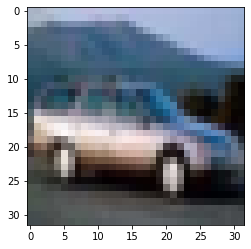

In [ ]:
#to show dataset
plt.imshow(X_train_full[4])

In [ ]:
#to view the category of what we called above
data_categories = ["Airplane", "Automobile", "Bird", "Cat", "Deer",
                   "Dog", "frog", "Horse", "Ship", "Truck"]
np.take(data_categories, y_train_full[4])

array(['Automobile'], dtype='<U10')

In [ ]:
#this tells us how much data we're working with
X_test.shape

(10000, 32, 32, 3)

In [ ]:
#to normalize the data
Xt_norm = X_train_full.astype('float32')
X_test_norm = X_test.astype('float32')

Xt_norm = Xt_norm/255.0  #because we want it to be a float
X_test_norm = X_test_norm/255.0

In [ ]:
#manually splitting the training, validation and testing data
X_val, X_train = Xt_norm[:5000], Xt_norm[5000:]
y_val, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test_norm

#X_train to train the model
#X_val to fine tune the model
#X_test to check if the model works properly after training

In [ ]:
#first set random seed so results stay the same
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
#model creation using sequential API of keras
#triple layer sequential model
model_1 = keras.models.Sequential()
model_1.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
model_1.add(keras.layers.Dense(300, activation="relu"))
model_1.add(keras.layers.Dense(100, activation="relu"))
model_1.add(keras.layers.Dense(50, activation="relu"))
model_1.add(keras.layers.Dense(10, activation="Softmax"))

In [ ]:
#to setup the learning Process
model_1.compile(loss="sparse_categorical_crossentropy",
                optimizer="sgd",
                metrics=["accuracy"])

In [ ]:
model_1hist = model_1.fit(X_train, y_train, epochs=80,
                          validation_data=(X_val, y_val))

Epoch 1/80
1407/1407 [==============================] - 13s 9ms/step - loss: 1.9221 - accuracy: 0.3045 - val_loss: 1.9363 - val_accuracy: 0.2976
Epoch 2/80
1407/1407 [==============================] - 12s 9ms/step - loss: 1.7272 - accuracy: 0.3837 - val_loss: 1.7614 - val_accuracy: 0.3506
Epoch 3/80
1407/1407 [==============================] - 11s 8ms/step - loss: 1.6411 - accuracy: 0.4141 - val_loss: 1.9002 - val_accuracy: 0.3154
Epoch 4/80
1407/1407 [==============================] - 11s 8ms/step - loss: 1.5826 - accuracy: 0.4363 - val_loss: 1.9664 - val_accuracy: 0.3298
Epoch 5/80
1407/1407 [==============================] - 12s 9ms/step - loss: 1.5394 - accuracy: 0.4542 - val_loss: 1.5987 - val_accuracy: 0.4196
Epoch 6/80
1407/1407 [==============================] - 14s 10ms/step - loss: 1.4984 - accuracy: 0.4709 - val_loss: 1.5493 - val_accuracy: 0.4436
Epoch 7/80
1407/1407 [==============================] - 16s 11ms/step - loss: 1.4649 - accuracy: 0.4810 - val_loss: 1.5907 - val_

In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 300)               921900    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 50)                5050      
                                                                 
 dense_3 (Dense)             (None, 10)                510       
                                                                 
Total params: 957,560
Trainable params: 957,560
Non-trainable params: 0
_________________________________________________________________


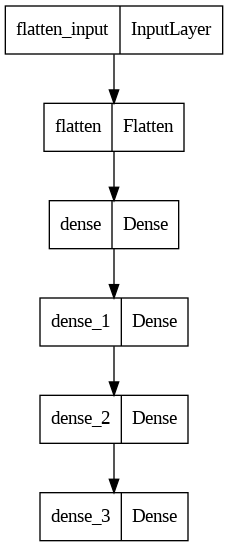

In [ ]:
import pydot
keras.utils.plot_model(model_1)

In [ ]:
#also data good for documenting
weights, biases = model_1.layers[1].get_weights()
weights.shape


(3072, 300)

In [ ]:
biases.shape

(300,)

In [ ]:
model_1hist.params

{'verbose': 1, 'epochs': 80, 'steps': 1407}

In [ ]:
model_1hist.history

{'loss': [1.9220919609069824,
  1.7271798849105835,
  1.6411184072494507,
  1.5825544595718384,
  1.5394318103790283,
  1.4984498023986816,
  1.4649358987808228,
  1.438167929649353,
  1.409578561782837,
  1.3840254545211792,
  1.3605015277862549,
  1.341328501701355,
  1.3239649534225464,
  1.299296259880066,
  1.2832914590835571,
  1.2660422325134277,
  1.2484378814697266,
  1.232344150543213,
  1.211958646774292,
  1.1968073844909668,
  1.1825320720672607,
  1.1686912775039673,
  1.1534258127212524,
  1.1384018659591675,
  1.1235357522964478,
  1.1074953079223633,
  1.0954582691192627,
  1.0771456956863403,
  1.0680696964263916,
  1.0494500398635864,
  1.0383003950119019,
  1.0227397680282593,
  1.0107665061950684,
  0.9979045987129211,
  0.982151985168457,
  0.9727935791015625,
  0.9563010334968567,
  0.9441695213317871,
  0.9325966835021973,
  0.9199015498161316,
  0.9066930413246155,
  0.8977562785148621,
  0.8861827850341797,
  0.870785653591156,
  0.8587163090705872,
  0.851192

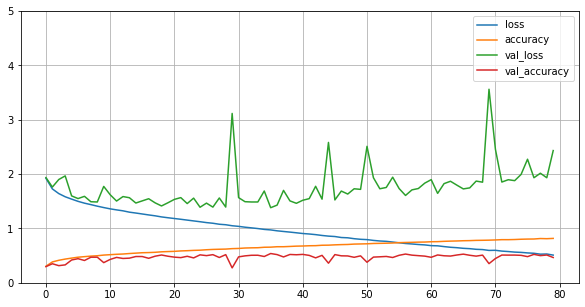

In [ ]:
pd.DataFrame(model_1hist.history).plot(figsize=(10, 5))
plt.grid(True)
plt.gca().set_ylim(0, 5)
plt.show()

In [ ]:
model_eval = model_1.evaluate(X_test, y_test)
print("Test loss:", model_eval[0])
print("Test accuracy:", model_eval[1])

313/313 [==============================] - 1s 4ms/step - loss: 2.4664 - accuracy: 0.4575
Test loss: 2.466402292251587
Test accuracy: 0.45750001072883606


In [ ]:
x_new = X_test[:8]

In [ ]:
y_proba = model_1.predict(x_new)
y_proba.round(2)

1/1 [==============================] - 0s 112ms/step


array([[0.  , 0.  , 0.06, 0.75, 0.17, 0.01, 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.78, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.21],
       [0.61, 0.23, 0.04, 0.  , 0.03, 0.  , 0.  , 0.02, 0.07, 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.8 , 0.  , 0.19, 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.01, 0.02, 0.02, 0.01, 0.94, 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [ ]:
y_pred = np.argmax(model_1.predict(x_new), axis=-1)
y_pred

1/1 [==============================] - 0s 47ms/step


array([3, 1, 1, 0, 4, 6, 1, 6])

In [ ]:
np.array(data_categories)[y_pred]

array(['Cat', 'Automobile', 'Automobile', 'Airplane', 'Deer', 'frog',
       'Automobile', 'frog'], dtype='<U10')

AxesImage(54,36;334.8x217.44)


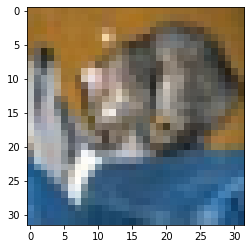

In [ ]:
print(plt.imshow(X_test[0]))